<a href="https://colab.research.google.com/github/yashdy03/hinglish-hate-speech-detection/blob/main/Copy_of_Copy_of_Copy_of_Minor_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING DRIVE**

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORTING ESSENTIAL LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# **LOADING DATASET**

In [ ]:
train_annot = pd.read_csv("/content/drive/MyDrive/datasets/minor -2 dataset/Train-2.csv", encoding='latin-1')
train_annot.dropna(how="any", inplace=True, axis=0)
train_annot.columns = ['text', 'label']

train_annot.head()

test_data = pd.read_csv("/content/drive/MyDrive/datasets/minor -2 dataset/Test-2.csv", encoding='latin-1')
test_data.dropna(how="any", inplace=True, axis=0)
test_data.columns = ['text', 'label']

In [ ]:
train_annot.describe()

,label
count,3726.000000
mean,0.376543
std,0.484584
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
train_annot.groupby('label').describe()


text                                                               
      count unique                                                top freq
label                                                                     
0      2323   2323  Knowing ki Vikas kitna samjhata hai Priyanka a...    1
1      1403   1403  Sarkar banne ke bad Hindu hit me ek bhi faisla...    1

In [ ]:
train_annot['text_len'] = train_annot.text.apply(len)
train_annot.head()

test_data['text_len'] = test_data.text.apply(len)

In [ ]:
train_annot

,text,label,text_len
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0,126
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0,196
2,Doctor sab sahi me ke PhD (in hate politics) ...,0,166
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0,257
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1,140
...,...,...,...
3722,pehle confirm karo ke Mohammad ne sach mein 8 ...,0,79
3723,ye attankwadi Indian agent hai jo terrorism ph...,0,55
3724,bola na terrorism ko support karna band karoge...,0,69
3725,lagta hai aap ne movie dekhi hai which is writ...,0,125


In [ ]:
train_annot[train_annot.text_len == 126].text.iloc[0]
test_data[test_data.text_len == 126].text.iloc[0]

'Aur raha sawal terrorism ka to tum logon se ziyada to koi hai he nahi atankwad :) jo apne he kisano ka khoon baha rahe hain :('

# **Dataset Pre-Processing**

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

**Lower Casing**

In [ ]:
train_annot["text_lower"] = train_annot["text"].str.lower()
test_data["text_lower"] = test_data["text"].str.lower()
train_annot.head()

,text,label,text_len,text_lower
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0,126,knowing ki vikas kitna samjhata hai priyanka a...
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0,196,i am muhajir .. aur mere lye sab se pehly paki...
2,Doctor sab sahi me ke PhD (in hate politics) ...,0,166,doctor sab sahi me ke phd (in hate politics) ...
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0,257,poore desh me patel obc me aate hain sirf gujr...
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1,140,sarkar banne ke bad hindu hit me ek bhi faisla...


**Removal of Punctuations**

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

train_annot["text_wo_punct and lower"] = train_annot["text_lower"].apply(lambda text_lower: remove_punctuation(text_lower))
test_data["text_wo_punct and lower"] = test_data["text_lower"].apply(lambda text_lower: remove_punctuation(text_lower))
train_annot.head()

,text,label,text_len,text_lower,text_wo_punct and lower
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0,126,knowing ki vikas kitna samjhata hai priyanka a...,knowing ki vikas kitna samjhata hai priyanka a...
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0,196,i am muhajir .. aur mere lye sab se pehly paki...,i am muhajir aur mere lye sab se pehly pakist...
2,Doctor sab sahi me ke PhD (in hate politics) ...,0,166,doctor sab sahi me ke phd (in hate politics) ...,doctor sab sahi me ke phd in hate politics wa...
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0,257,poore desh me patel obc me aate hain sirf gujr...,poore desh me patel obc me aate hain sirf gujr...
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1,140,sarkar banne ke bad hindu hit me ek bhi faisla...,sarkar banne ke bad hindu hit me ek bhi faisla...


**Removal of Stopwords**

In [ ]:
import nltk


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

train_annot["text_wo_stop"] = train_annot["text_wo_punct and lower"].apply(lambda text: remove_stopwords(text))
train_annot.head()

test_data["text_wo_stop"] = test_data["text_wo_punct and lower"].apply(lambda text: remove_stopwords(text))

**Removal of Frequent words**

In [ ]:
from collections import Counter
cnt = Counter()
for text in train_annot["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('hai', 2359),
 ('rape', 1815),
 ('ki', 1288),
 ('ko', 1215),
 ('ka', 1164),
 ('hate', 1125),
 ('ke', 1078),
 ('se', 956),
 ('ho', 859),
 ('aur', 790)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

train_annot["text_wo_stopfreq"] = train_annot["text_wo_stop"].apply(lambda text: remove_freqwords(text))
train_annot.head()

,text,label,text_len,text_lower,text_wo_punct and lower,text_wo_stop,text_wo_stopfreq
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0,126,knowing ki vikas kitna samjhata hai priyanka a...,knowing ki vikas kitna samjhata hai priyanka a...,knowing ki vikas kitna samjhata hai priyanka a...,knowing vikas kitna samjhata priyanka itch gua...
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0,196,i am muhajir .. aur mere lye sab se pehly paki...,i am muhajir aur mere lye sab se pehly pakist...,muhajir aur mere lye sab se pehly pakistan agr...,muhajir mere lye sab pehly pakistan agr 10 lak...
2,Doctor sab sahi me ke PhD (in hate politics) ...,0,166,doctor sab sahi me ke phd (in hate politics) ...,doctor sab sahi me ke phd in hate politics wa...,doctor sab sahi ke phd hate politics wale bhai...,doctor sab sahi phd politics wale bhai padhe l...
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0,257,poore desh me patel obc me aate hain sirf gujr...,poore desh me patel obc me aate hain sirf gujr...,poore desh patel obc aate hain sirf gujrat ko ...,poore desh patel obc aate hain sirf gujrat cho...
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1,140,sarkar banne ke bad hindu hit me ek bhi faisla...,sarkar banne ke bad hindu hit me ek bhi faisla...,sarkar banne ke bad hindu hit ek bhi faisla jo...,sarkar banne bad hindu hit ek bhi faisla jo bj...


In [ ]:

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

train_annot["text_wo_stopfreqrare"] = train_annot["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
train_annot.head()

,text,label,text_len,text_lower,text_wo_punct and lower,text_wo_stop,text_wo_stopfreq,text_wo_stopfreqrare
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0,126,knowing ki vikas kitna samjhata hai priyanka a...,knowing ki vikas kitna samjhata hai priyanka a...,knowing ki vikas kitna samjhata hai priyanka a...,knowing vikas kitna samjhata priyanka itch gua...,knowing vikas kitna samjhata priyanka itch gua...
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0,196,i am muhajir .. aur mere lye sab se pehly paki...,i am muhajir aur mere lye sab se pehly pakist...,muhajir aur mere lye sab se pehly pakistan agr...,muhajir mere lye sab pehly pakistan agr 10 lak...,muhajir mere lye sab pehly pakistan agr 10 lak...
2,Doctor sab sahi me ke PhD (in hate politics) ...,0,166,doctor sab sahi me ke phd (in hate politics) ...,doctor sab sahi me ke phd in hate politics wa...,doctor sab sahi ke phd hate politics wale bhai...,doctor sab sahi phd politics wale bhai padhe l...,doctor sab sahi phd politics wale bhai padhe l...
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0,257,poore desh me patel obc me aate hain sirf gujr...,poore desh me patel obc me aate hain sirf gujr...,poore desh patel obc aate hain sirf gujrat ko ...,poore desh patel obc aate hain sirf gujrat cho...,poore desh patel obc aate hain sirf gujrat cho...
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1,140,sarkar banne ke bad hindu hit me ek bhi faisla...,sarkar banne ke bad hindu hit me ek bhi faisla...,sarkar banne ke bad hindu hit ek bhi faisla jo...,sarkar banne bad hindu hit ek bhi faisla jo bj...,sarkar banne bad hindu hit ek bhi faisla jo bj...


In [ ]:
from collections import Counter
cnt_test = Counter()
for text in test_data["text_wo_stop"].values:
    for word in text.split():
        cnt_test[word] += 1
        
cnt_test.most_common(10)

FREQWORDS_test = set([w for (w, wc) in cnt_test.most_common(10)])
def remove_freqwords_test(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS_test])

test_data["text_wo_stopfreq"] = test_data["text_wo_stop"].apply(lambda text: remove_freqwords_test(text))
test_data.head()

n_rare_words_test = 10
RAREWORDS_test = set([w for (w, wc) in cnt_test.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords_test(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS_test])

test_data["text_wo_stopfreqrare"] = test_data["text_wo_stopfreq"].apply(lambda text: remove_rarewords_test(text))
test_data.head()

,text,label,text_len,text_lower,text_wo_punct and lower,text_wo_stop,text_wo_stopfreq,text_wo_stopfreqrare
0,#zulmkekhilaf SB k desh men me zulm rape n mur...,1,114,#zulmkekhilaf sb k desh men me zulm rape n mur...,zulmkekhilaf sb k desh men me zulm rape n murd...,zulmkekhilaf sb k desh men zulm rape n murder ...,zulmkekhilaf sb k desh men zulm n murder badh ...,zulmkekhilaf sb k desh men zulm n murder badh ...
1,Spread karne na karne se Kuchh nahi hota. Indi...,0,136,spread karne na karne se kuchh nahi hota. indi...,spread karne na karne se kuchh nahi hota india...,spread karne na karne se kuchh nahi hota india...,spread karne na karne kuchh nahi hota indians ...,spread karne na karne kuchh nahi hota indians ...
2,dhamki dene wale rape ki paidaish hi hain saale,1,47,dhamki dene wale rape ki paidaish hi hain saale,dhamki dene wale rape ki paidaish hi hain saale,dhamki dene wale rape ki paidaish hi hain saale,dhamki dene wale paidaish hi hain saale,dhamki dene wale paidaish hi hain saale
3,Yogi tere raj me roze dar ladki ka rape hua !!,0,46,yogi tere raj me roze dar ladki ka rape hua !!,yogi tere raj me roze dar ladki ka rape hua,yogi tere raj roze dar ladki ka rape hua,yogi tere raj roze dar ladki hua,yogi tere raj roze dar ladki hua
4,Waha to awaz nahi nikalti hai kyuki wo rape hi...,1,135,waha to awaz nahi nikalti hai kyuki wo rape hi...,waha to awaz nahi nikalti hai kyuki wo rape hi...,waha awaz nahi nikalti hai kyuki wo rape hindu...,waha awaz nahi nikalti kyuki wo hindu bhai ne ...,waha awaz nahi nikalti kyuki wo hindu bhai ne ...


**Stemming**

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

train_annot["Clean_text"] = train_annot["text_wo_stopfreqrare"].apply(lambda text: stem_words(text))
train_annot.head()

test_data["Clean_text"] = test_data["text_wo_stopfreqrare"].apply(lambda text: stem_words(text))

**Removal of Emojis**

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("game is on 🔥🔥")

'game is on '

In [ ]:
remove_emoji("Hilarious😂")

'Hilarious'

**Removal of Emoticons**

In [ ]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses"
}

In [ ]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")

'Hello '

In [ ]:
train_annot.drop(["text_wo_stopfreq", "text_wo_stopfreqrare","text_lower","text_wo_punct and lower"], axis=1, inplace=True) 
test_data.drop(["text_wo_stopfreq", "text_wo_stopfreqrare","text_lower","text_wo_punct and lower"], axis=1, inplace=True) 

In [ ]:
train_annot.head()

,text,label,text_len,text_wo_stop,Clean_text
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0,126,knowing ki vikas kitna samjhata hai priyanka a...,know vika kitna samjhata priyanka itch guard l...
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0,196,muhajir aur mere lye sab se pehly pakistan agr...,muhajir mere lye sab pehli pakistan agr 10 lak...
2,Doctor sab sahi me ke PhD (in hate politics) ...,0,166,doctor sab sahi ke phd hate politics wale bhai...,doctor sab sahi phd polit wale bhai padh likh ...
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0,257,poore desh patel obc aate hain sirf gujrat ko ...,poor desh patel obc aat hain sirf gujrat chor ...
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1,140,sarkar banne ke bad hindu hit ek bhi faisla jo...,sarkar bann bad hindu hit ek bhi faisla jo bjp...


In [ ]:
train_annot

,text,label,text_len,text_wo_stop,Clean_text
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0,126,knowing ki vikas kitna samjhata hai priyanka a...,know vika kitna samjhata priyanka itch guard l...
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0,196,muhajir aur mere lye sab se pehly pakistan agr...,muhajir mere lye sab pehli pakistan agr 10 lak...
2,Doctor sab sahi me ke PhD (in hate politics) ...,0,166,doctor sab sahi ke phd hate politics wale bhai...,doctor sab sahi phd polit wale bhai padh likh ...
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0,257,poore desh patel obc aate hain sirf gujrat ko ...,poor desh patel obc aat hain sirf gujrat chor ...
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1,140,sarkar banne ke bad hindu hit ek bhi faisla jo...,sarkar bann bad hindu hit ek bhi faisla jo bjp...
...,...,...,...,...,...
3722,pehle confirm karo ke Mohammad ne sach mein 8 ...,0,79,pehle confirm karo ke mohammad ne sach mein 8 ...,pehl confirm karo mohammad ne sach mein 8 saal...
3723,ye attankwadi Indian agent hai jo terrorism ph...,0,55,ye attankwadi indian agent hai jo terrorism ph...,ye indian agent jo terror phelat
3724,bola na terrorism ko support karna band karoge...,0,69,bola na terrorism ko support karna band karoge...,bola na terror support karna band karog tu kaa...
3725,lagta hai aap ne movie dekhi hai which is writ...,0,125,lagta hai aap ne movie dekhi hai written srk o...,lagta aap ne movi dekhi srk ne terror siva kuc...


In [ ]:
test_data

,text,label,text_len,text_wo_stop,Clean_text
0,#zulmkekhilaf SB k desh men me zulm rape n mur...,1,114,zulmkekhilaf sb k desh men zulm rape n murder ...,zulmkekhilaf sb k desh men zulm n murder badh ...
1,Spread karne na karne se Kuchh nahi hota. Indi...,0,136,spread karne na karne se kuchh nahi hota india...,spread karn na karn kuchh nahi hota indian pak...
2,dhamki dene wale rape ki paidaish hi hain saale,1,47,dhamki dene wale rape ki paidaish hi hain saale,dhamki dene wale paidaish hi hain saal
3,Yogi tere raj me roze dar ladki ka rape hua !!,0,46,yogi tere raj roze dar ladki ka rape hua,yogi tere raj roze dar ladki hua
4,Waha to awaz nahi nikalti hai kyuki wo rape hi...,1,135,waha awaz nahi nikalti hai kyuki wo rape hindu...,waha awaz nahi nikalti kyuki wo hindu bhai ne ...
...,...,...,...,...,...
842,Toilets tm log banwa ni sakte,1,29,toilets tm log banwa ni sakte,toilet tm log ni sakt
843,Rape tm log rukwa ni sakte,1,26,rape tm log rukwa ni sakte,tm log ni sakt
844,Aur phir mun utha Kar ah jate ho Twitter par,1,44,aur phir mun utha kar ah jate ho twitter par,phir kar jate twitter par
845,News mai dekhte nahi in chakro makn Khoon Hojate,1,49,news mai dekhte nahi chakro makn khoon hojate,news mai dekht nahi khoon hojat


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

pipeline_SGD = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('nb', SGDClassifier()),])



In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(train_annot['text'], train_annot['label'], random_state=0)

max_features = 50000
# Creating train, validation and test sequences
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

x_train = tokenizer.texts_to_sequences(X_train)
x_valid = tokenizer.texts_to_sequences(X_test)
x_test = tokenizer.texts_to_sequences(test_data['text'])

# Padding the sequences
maxlen = 32
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_valid = pad_sequences(x_valid, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

# Converting labels to numpy arrays
train_labels = np.asarray(y_train)
valid_labels = np.asarray(y_test)
test_labels = np.asarray(test_data['label'].tolist())

# Creating train, validation, and test datasets
train_ds = tf.data.Dataset.from_tensor_slices((x_train, train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, test_labels))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

,label
0,2323
1,1403


0s : 1s  ::   1.66 : 1


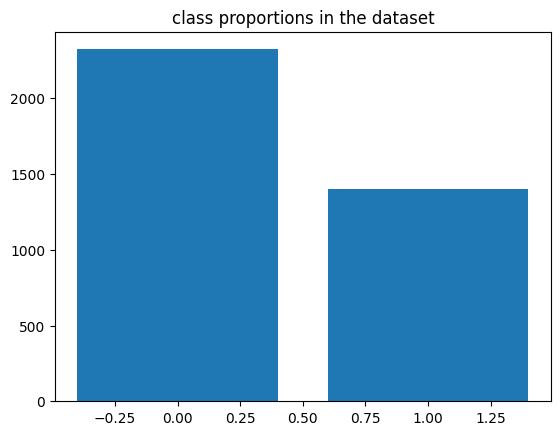

In [ ]:
display(train_annot['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(train_annot['label'].value_counts()[0]/train_annot['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],train_annot['label'].value_counts())
plt.title("class proportions in the dataset")
plt.show()

In [ ]:


print(len(valid_labels))
print(len(valid_labels))
print(train_labels.shape)
print(valid_labels.shape)



932
932
(2794,)
(932,)


In [ ]:
valid_ds_np = valid_ds.as_numpy_iterator()
for x_valid, y_valid in valid_ds_np:
    print(f'Validation data shape: {x_valid.shape}, {y_valid.shape}')
    break


Validation data shape: (32,), ()


In [ ]:
print(train_ds.element_spec)



(TensorSpec(shape=(32,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


# ***LSTM***

In [ ]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers import Input, Activation
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.models import Model

def create_lstm_model():
    tweet_input = Input(shape=(maxlen,), dtype='int32')
    #tweet_encoder = Embedding(num_words, 200, weights=[embedding_matrix], input_length=maxlen, trainable=True)(tweet_input)
    tweet_encoder = Embedding(num_words, 200, input_length=maxlen)(tweet_input)
    tweet_encoder = Dropout(0.5)(tweet_encoder)
    merged = LSTM(100)(tweet_encoder)
    merged = Dropout(0.5)(merged)
    merged = Dense(1)(merged)
    output = Activation('sigmoid')(merged)
    model = Model(inputs=[tweet_input], outputs=[output])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.summary()
    return model

lstm_model = create_lstm_model()
lstm_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
88/88 [==============================] - 23s 205ms/step - loss: 0.6539 - accuracy: 0.6163
Epoch 2/10
88/88 [==============================] - 12s 136ms/step - loss: 0.5328 - accuracy: 0.7316
Epoch 3/10
88/88 [==============================] - 5s 56ms/step - loss: 0.2934 - accuracy: 0.8973
Epoch 4/10
88/88 [==============================] - 3s 31ms/step - loss: 0.1386 - accuracy: 0.9553
Epoch 5/10
88/88 [==============================] - 2s 22ms/step - loss: 0.0791 - accuracy: 0.9782
Epoch 6/10
88/88 [==============================] - 2s 19ms/step - loss: 0.0488 - accuracy: 0.9839
Epoch 7/10
88/88 [==============================] - 2s 21ms/step - loss: 0.0200 - accuracy: 0.9946
Epoch 8/10
88/88 [==============================] - 1s 17ms/step - loss: 0.0242 - accuracy: 0.9946
Epoch 9/10
88/88 [==============================] - 2s 23ms/step - loss: 0.0158 - accuracy: 0.9961
Epoch 10/10
88/88 [==============================] - 1s 17ms/step - loss: 0.0196 - accuracy: 0.9953


In [ ]:
# Assuming you have already trained your LSTM model and have x_test and y_test data

# Evaluate the model on the test data
loss, accuracy = lstm_model.evaluate(x_test, test_labels, verbose=1)

# Print the test loss and accuracy
print('Test loss:', loss)
print('Test accuracy:', accuracy)


27/27 [==============================] - 1s 3ms/step - loss: 1.9231 - accuracy: 0.6434
Test loss: 1.9231256246566772
Test accuracy: 0.6434474587440491


In [ ]:
lstm_model.save('model.h5')

# **BERT-CNN**

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install -q tensorflow-text
!pip install -q tf-models-official
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 

In [ ]:
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow.keras.backend as K
from scipy.stats import spearmanr
from math import floor, ceil
from transformers import *

np.set_printoptions(suppress=True)
print(tf.__version__)

import shutil
from official.nlp import optimization

tf.get_logger().setLevel('ERROR')

2.12.0


In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'
map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/1',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1


In [ ]:
!pip install tensorflow-hub --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **PRE PROCESSING FOR BERT-CNN**

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
#for text_batch, label_batch in train_ds.take(1):
 # for i in range(1):
  #  tweet = text_batch.numpy()[i]
   # print(f'Tweet: {text_batch.numpy()[i]}')
    #label = label_batch.numpy
    #print(f'Label : {label}')

In [ ]:
initial_output_bias = np.array([3.938462, 15])
initial_output_bias

array([ 3.938462, 15.      ])

In [ ]:
def build_classifier_model(output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        #print(output_bias)
        
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dense(512, activation="relu")(net)
    net = tf.keras.layers.Dropout(0.2)(net)
#   net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    net = tf.keras.layers.Dense(2, activation="softmax", name='classifier', bias_initializer=output_bias)(net)
    
    return tf.keras.Model(text_input, net)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

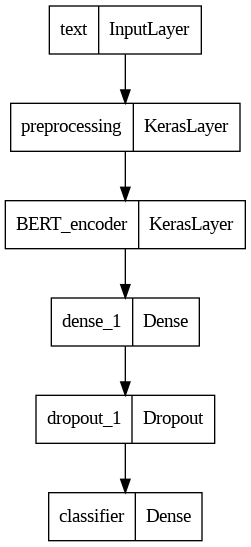

In [ ]:
classifier_model = build_classifier_model(output_bias=initial_output_bias)
classifier_model.get_weights()[-1]
classifier_model.summary()
tf.keras.utils.plot_model(classifier_model)


In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
#metrics = tf.metrics.Accuracy()

In [ ]:
epochs = 80
steps_per_epoch = int(tf.data.experimental.cardinality(train_ds).numpy())
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

classifier_model.compile(optimizer=optimizer,
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

In [ ]:
weight_for_0 = (1 / 2323)*(3726)/3.0 
weight_for_1 = (1 / 1403)*(3726)/3.0



class_weight = {0: weight_for_0, 1: weight_for_1}

In [ ]:
print(classifier_model.input_names)
for x, y in train_ds.take(1):
    print(x)
    print(y)
    
for x, y in valid_ds.take(1):
    print(x)
    print(y)


['text']
tf.Tensor(
[  73  107   12   13 3953    4   67  118   42   13 1843   19  538   15
  108 3954  127  364 2500 2501    6  108 2502    4  162   24  398  398
  735    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int32)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(
[  221   559    38  1672  3663  3288    67    10    43     2     1  6392
   208    43     2  1753  3575 10706     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
def one_hot_label(text, label):
    label = tf.cast(label, tf.int32) # convert label to int32
    one_hot = tf.one_hot(label, depth=2)
    return text, one_hot

train_ds = train_ds.map(one_hot_label)
valid_ds = valid_ds.map(one_hot_label)
test_ds = test_ds.map(one_hot_label)

In [ ]:
valid_ds_np = valid_ds.as_numpy_iterator()
for x_valid, y_valid in valid_ds_np:
    print(f'Validation data shape: {x_valid.shape}, {y_valid.shape}')
    break


Validation data shape: (32,), (2,)


In [ ]:
print(f'Training model with {tfhub_handle_encoder}')

class PrintShapesCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        print(f"Labels shape: {logs['size']}")
        print(f"Logits shape: {logs['outputs'].shape}")


history = classifier_model.fit(train_ds, validation_data=valid_ds, epochs=epochs, class_weight=class_weight,callbacks=[PrintShapesCallback()])


Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1


NameError: ignored

# **ELMO**

In [ ]:
# Define the ELMo layer
elmo = hub.KerasLayer("https://tfhub.dev/google/elmo/3", output_shape=[None, 1024], input_shape=[], dtype=tf.string)

# Define the model architecture
model = tf.keras.Sequential([
    elmo,
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

# Convert train_annot and test_data to tensor slices
train_ds = tf.data.Dataset.from_tensor_slices((train_annot['text'], train_annot['label']))
valid_ds = tf.data.Dataset.from_tensor_slices((test_data['text'], test_data['label']))

# Shuffle and batch the datasets
train_ds = train_ds.shuffle(len(train_annot)).batch(32)
valid_ds = valid_ds.shuffle(len(test_data)).batch(32)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model on train_ds
model.fit(train_ds, validation_data=valid_ds, epochs=5)

# Evaluate the model on test_ds
test_ds = tf.data.Dataset.from_tensor_slices(test_data['text'])
test_ds = test_ds.batch(32)
model.evaluate(test_ds)

NameError: ignored

In [ ]:
# Save the model
model.save("elmo_model.h5")


**BI-LSTM**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau,CSVLogger
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.layers import (
    BatchNormalization, LSTM,SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,Embedding,Conv1D, GlobalMaxPooling1D 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
import shutil

In [ ]:
from keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional

In [ ]:
nRowsRead = None

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/datasets/minor -2 dataset/Train-2.csv', delimiter=',', nrows = nRowsRead)

In [ ]:
df0

,text,label
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0
2,Doctor sab sahi me ke PhD (in hate politics) ...,0
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1
...,...,...
3722,pehle confirm karo ke Mohammad ne sach mein 8 ...,0
3723,ye attankwadi Indian agent hai jo terrorism ph...,0
3724,bola na terrorism ko support karna band karoge...,0
3725,lagta hai aap ne movie dekhi hai which is writ...,0


In [ ]:
nRow, nCol = df0.shape

In [ ]:
print('There are {} rows and {} columns'.format(nRow, nCol))

There are 3727 rows and 2 columns


In [ ]:
a=df0['text']

In [ ]:
a

0       Knowing ki Vikas kitna samjhata hai Priyanka a...
1       I am Muhajir .. Aur mere lye sab se Pehly Paki...
2       Doctor  sab sahi me ke PhD (in hate politics) ...
3       Poore Desh me Patel OBC me aate Hain sirf gujr...
4       Sarkar banne ke bad Hindu hit me ek bhi faisla...
                              ...                        
3722    pehle confirm karo ke Mohammad ne sach mein 8 ...
3723    ye attankwadi Indian agent hai jo terrorism ph...
3724    bola na terrorism ko support karna band karoge...
3725    lagta hai aap ne movie dekhi hai which is writ...
3726    tum log terrorism ko support karna band kardo ...
Name: text, Length: 3727, dtype: object

In [ ]:
b=df0['label'].map({0: '0', 1: '1'})

In [ ]:
b

0       0
1       0
2       0
3       0
4       1
       ..
3722    0
3723    0
3724    0
3725    0
3726    0
Name: label, Length: 3727, dtype: object

In [ ]:
df= pd.concat([a,b], axis=1)

In [ ]:
nhate,hate = np.bincount(df['label'])


In [ ]:
total=nhate+hate

In [ ]:
print('Examples:\n    Total: {}\n    nhate: {} ({:.2f}% of total)\n'.format(
    total, nhate, 100 * nhate / total))
print('Examples:\n    Total: {}\n    hate: {} ({:.2f}% of total)\n'.format(
    total, hate, 100 * hate / total))


Examples:
    Total: 3727
    nhate: 2323 (62.33% of total)

Examples:
    Total: 3727
    hate: 1404 (37.67% of total)



In [ ]:
df

,text,label
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0
2,Doctor sab sahi me ke PhD (in hate politics) ...,0
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1
...,...,...
3722,pehle confirm karo ke Mohammad ne sach mein 8 ...,0
3723,ye attankwadi Indian agent hai jo terrorism ph...,0
3724,bola na terrorism ko support karna band karoge...,0
3725,lagta hai aap ne movie dekhi hai which is writ...,0


In [ ]:
df["text"] = str(df["text"]).lower()

In [ ]:
df['label'] = df['label'].astype(int)

In [ ]:
x= df['text']
y=df['label']

In [ ]:
texts = x
target = y

In [ ]:
type(texts)

pandas.core.series.Series

In [ ]:
type(target)

pandas.core.series.Series

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

In [ ]:
vocab_length = len(word_tokenizer.word_index) + 1

def embed(text_data): 
    return word_tokenizer.texts_to_sequences(text_data)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

In [ ]:
train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

In [ ]:
embeddings_dictionary = dict()
embedding_dim = 100

In [ ]:
embedding_matrix = np.zeros((vocab_length, embedding_dim))
#creating embedding matrix
for word, index in word_tokenizer.word_index.items(): 
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    target, 
    test_size=0.25
)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train=y_train.to_numpy()

In [ ]:
y_test=y_test.to_numpy()

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
X_train = X_train.astype(int)

In [ ]:
X_test = X_test.astype(int)

In [ ]:
y_train = y_train.astype(int)

In [ ]:
y_test = y_test.astype(int)

In [ ]:
X_train, x_val, y_train, y_val = train_test_split(
    X_train, 
    y_train,
    test_size=0.1 )


In [ ]:
def bilstm():
    model = Sequential()
    #adding embediing layer
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence))
    #adding Bi_lstm later
    model.add(Bidirectional(LSTM(
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2)))
    model.add(GlobalMaxPooling1D()) #globalmaxpooling_layer
    model.add(BatchNormalization()) #bath_normalisation
    model.add(Dropout(0.5)) #dropout_1
    model.add(Dense(length_long_sentence, activation = "relu")) #denselayer_1
    model.add(Dropout(0.5)) #dropout_2
    model.add(Dense(length_long_sentence, activation = "relu")) #denselayer_2
    model.add(Dropout(0.5)) #dropout_3
    model.add(Dense(3, activation = 'softmax')) #classification_layer
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
bilstm_model = bilstm()

In [ ]:
weight_class1 = (1 / nhate)*(total)/2.0 
weight_class2 = (1 / hate)*(total)/2.0
class_weight = {0: weight_class1, 1: weight_class2}

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)

In [ ]:
epoch_count=10
batch_size= 16

In [ ]:
X_test

array([[11, 12, 13, ...,  0,  0,  0],
       [11, 12, 13, ...,  0,  0,  0],
       [11, 12, 13, ...,  0,  0,  0],
       ...,
       [11, 12, 13, ...,  0,  0,  0],
       [11, 12, 13, ...,  0,  0,  0],
       [11, 12, 13, ...,  0,  0,  0]])

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
history = bilstm_model.fit(
    X_train, 
    y_train, 
    epochs = epoch_count,
    batch_size = batch_size,
    validation_data = (x_val, y_val),
    verbose = 1,
    callbacks = [reduce_lr],
    class_weight=class_weight
)

Epoch 1/10
158/158 [==============================] - 143s 908ms/step - loss: 0.9016 - accuracy: 0.4986 - val_loss: 0.8809 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 2/10
158/158 [==============================] - 146s 920ms/step - loss: 0.8687 - accuracy: 0.4946 - val_loss: 0.8518 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 3/10
158/158 [==============================] - 144s 912ms/step - loss: 0.8428 - accuracy: 0.3813 - val_loss: 0.8299 - val_accuracy: 0.3893 - lr: 0.0010
Epoch 4/10
158/158 [==============================] - 143s 907ms/step - loss: 0.8221 - accuracy: 0.3813 - val_loss: 0.8120 - val_accuracy: 0.3893 - lr: 0.0010
Epoch 5/10
158/158 [==============================] - 144s 910ms/step - loss: 0.8055 - accuracy: 0.5101 - val_loss: 0.7971 - val_accuracy: 0.3893 - lr: 0.0010
Epoch 6/10
158/158 [==============================] - 143s 905ms/step - loss: 0.7918 - accuracy: 0.3813 - val_loss: 0.7857 - val_accuracy: 0.3893 - lr: 0.0010
Epoch 7/10
158/158 [==========================

In [ ]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=17)
        ax[idx].set_xlabel('Loss ',fontsize=14)
        ax[idx].set_ylabel('Accuracy',fontsize=14)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

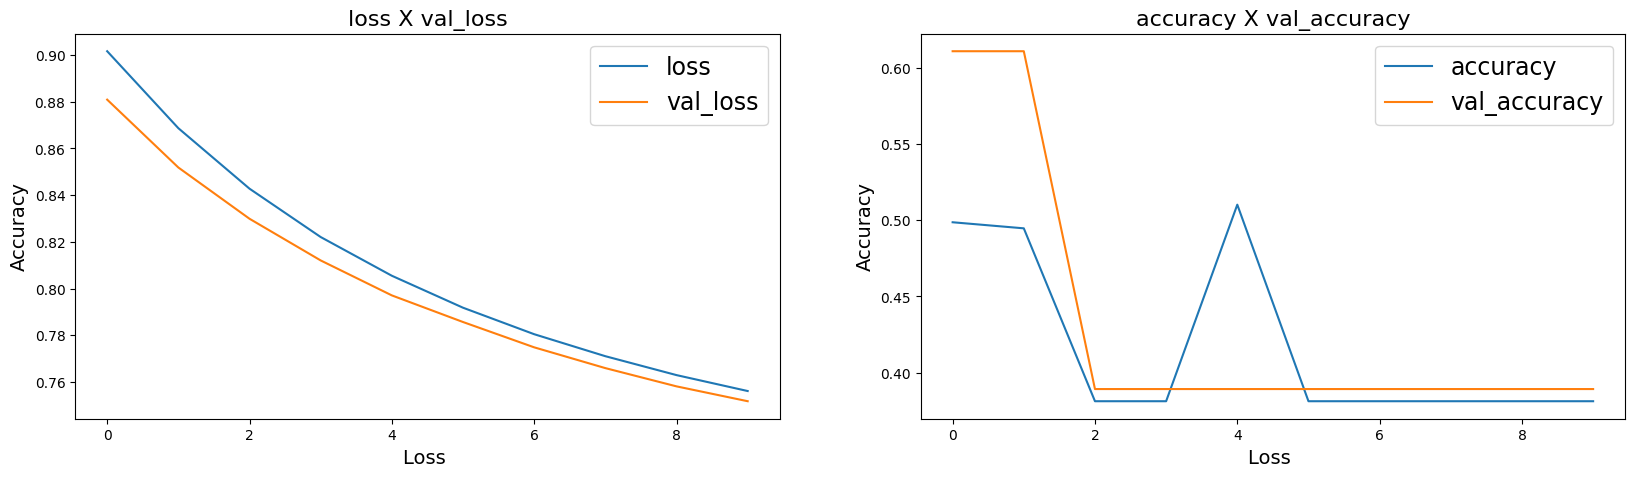

In [ ]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [ ]:
preds= np.argmax(bilstm_model.predict(X_test), axis=-1)

30/30 [==============================] - 4s 140ms/step


In [ ]:
print(classification_report(y_test,preds ))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.36      1.00      0.53       336

    accuracy                           0.36       932
   macro avg       0.18      0.50      0.26       932
weighted avg       0.13      0.36      0.19       932

[[  0 596]
 [  0 336]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
filters= 32
kernel_size=2
hidden_dims= 128

In [ ]:
def CNN():
    model = Sequential()
    #adding embedding layer
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence))
    # 2 CNN layer
    model.add(Conv1D(32,2,padding='valid', activation='relu')) #cnn_layer_1
    model.add(Conv1D(64,2,padding='valid',activation='relu')) #cnn_layer_2
    model.add(GlobalMaxPooling1D()) #globalmaxpooling_layer
    model.add(Dense(256, activation='relu')) #dense_layer
    model.add(Dropout(0.1)) #dropout_layer
    model.add(Dense(3, activation = 'softmax')) #classification layer
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
model2=CNN()

In [ ]:
history2 = model2.fit(
    X_train, 
    y_train, 
    epochs = epoch_count,
    batch_size = batch_size,
    validation_data = (x_val, y_val),
    verbose = 1,
    callbacks = [reduce_lr],
)

Epoch 1/10
158/158 [==============================] - 9s 9ms/step - loss: 1.0537 - accuracy: 0.6187 - val_loss: 1.0124 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 2/10
158/158 [==============================] - 1s 5ms/step - loss: 0.9775 - accuracy: 0.6187 - val_loss: 0.9467 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 3/10
158/158 [==============================] - 1s 5ms/step - loss: 0.9191 - accuracy: 0.6187 - val_loss: 0.8966 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 4/10
158/158 [==============================] - 1s 5ms/step - loss: 0.8745 - accuracy: 0.6187 - val_loss: 0.8580 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 5/10
158/158 [==============================] - 1s 5ms/step - loss: 0.8401 - accuracy: 0.6187 - val_loss: 0.8282 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 6/10
158/158 [==============================] - 1s 5ms/step - loss: 0.8133 - accuracy: 0.6187 - val_loss: 0.8048 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 7/10
158/158 [==============================] - 1s 5ms/step - lo

30/30 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       596
           1       0.00      0.00      0.00       336

    accuracy                           0.64       932
   macro avg       0.32      0.50      0.39       932
weighted avg       0.41      0.64      0.50       932

[[596   0]
 [336   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


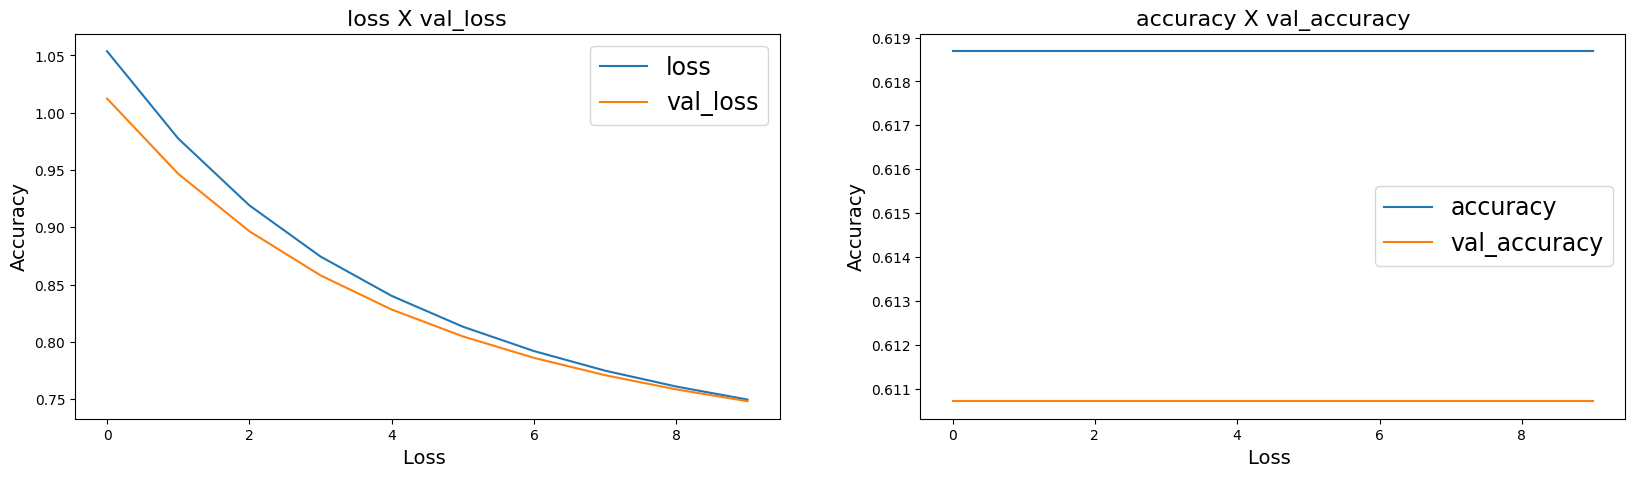

In [ ]:
plot_learning_curves(history2, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])
#predicting
pred2= np.argmax(model2.predict(X_test), axis=-1)
#printing reports
print(classification_report(y_test,pred2 ))
print(confusion_matrix(y_test, pred2))

In [ ]:
def MLP():
    model = Sequential()
    #embedding layer
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence))
    model.add(Flatten()) #flatten_layer
    model.add(Dense(512, activation='relu')) #dense_layer
    model.add(Dropout(0.2)) #dropout_layer
    model.add(Dense(3, activation = 'softmax'))#classification_layer
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
model3=MLP()

In [ ]:
history3 = model3.fit(
    X_train, 
    y_train, 
    epochs = epoch_count,
    batch_size = batch_size,
    validation_data = (x_val, y_val),
    verbose = 1,
    callbacks = [reduce_lr],
)


Epoch 1/10
158/158 [==============================] - 2s 5ms/step - loss: 1.0545 - accuracy: 0.6163 - val_loss: 1.0137 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 2/10
158/158 [==============================] - 1s 4ms/step - loss: 0.9790 - accuracy: 0.6187 - val_loss: 0.9484 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 3/10
158/158 [==============================] - 1s 4ms/step - loss: 0.9209 - accuracy: 0.6187 - val_loss: 0.8983 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 4/10
158/158 [==============================] - 1s 4ms/step - loss: 0.8761 - accuracy: 0.6187 - val_loss: 0.8596 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 5/10
158/158 [==============================] - 1s 5ms/step - loss: 0.8414 - accuracy: 0.6187 - val_loss: 0.8294 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 6/10
158/158 [==============================] - 1s 6ms/step - loss: 0.8142 - accuracy: 0.6187 - val_loss: 0.8058 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 7/10
158/158 [==============================] - 1s 6ms/step - lo

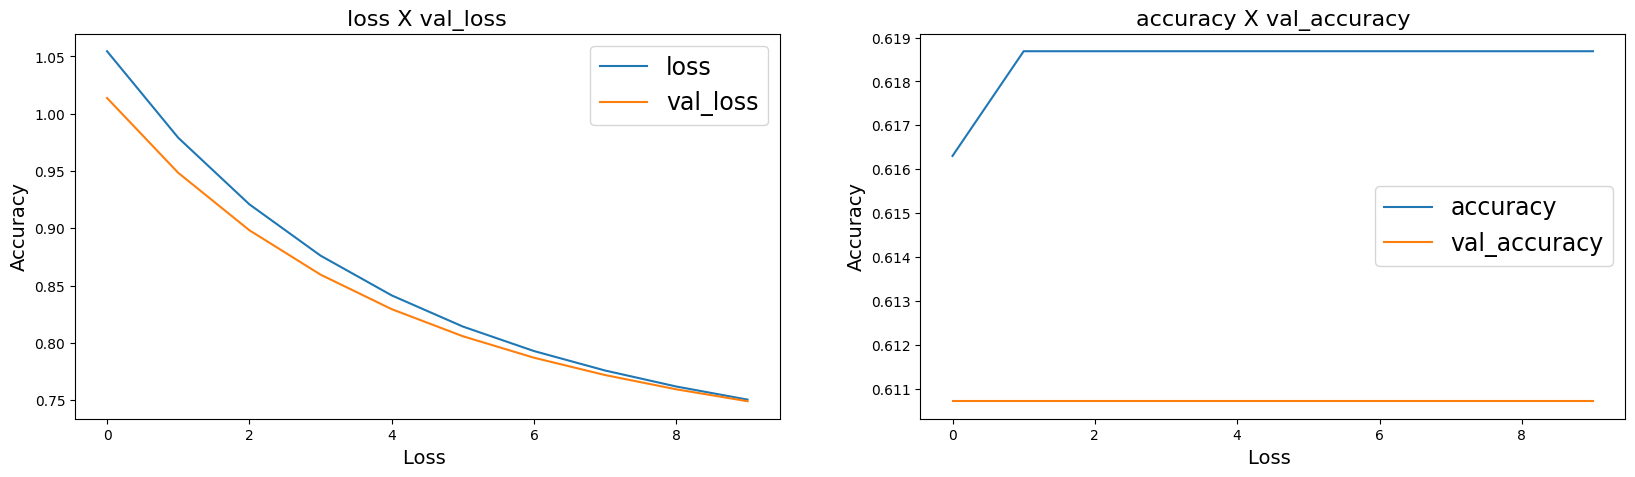

In [ ]:
plot_learning_curves(history3, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [ ]:
pred3= np.argmax(model3.predict(X_test), axis=-1)


30/30 [==============================] - 0s 1ms/step


In [ ]:
print(classification_report(y_test,pred3))
print(confusion_matrix(y_test, pred3))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       596
           1       0.00      0.00      0.00       336

    accuracy                           0.64       932
   macro avg       0.32      0.50      0.39       932
weighted avg       0.41      0.64      0.50       932

[[596   0]
 [336   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
